<a href="https://colab.research.google.com/github/MonKhach/Statistics_project/blob/main/stat_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1O3tv3oH2wfvGxPyFTbwqxK-mPBQeA7_v')

In [ ]:
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
cols = [
    'Sleep Duration',
    'Physical Activity Level',
    'Heart Rate',
    'Daily Steps',
    'Age',
    'Quality of Sleep',
    'Stress Level'
]

df[cols].describe(include='all')

,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps,Age,Quality of Sleep,Stress Level
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,7.132086,59.171123,70.165775,6816.844920,42.184492,7.312834,5.385027
std,0.795657,20.830804,4.135676,1617.915679,8.673133,1.196956,1.774526
min,5.800000,30.000000,65.000000,3000.000000,27.000000,4.000000,3.000000
25%,6.400000,45.000000,68.000000,5600.000000,35.250000,6.000000,4.000000
50%,7.200000,60.000000,70.000000,7000.000000,43.000000,7.000000,5.000000
75%,7.800000,75.000000,72.000000,8000.000000,50.000000,8.000000,7.000000
max,8.500000,90.000000,86.000000,10000.000000,59.000000,9.000000,8.000000


BMI categories

In [ ]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [ ]:
df["BMI_Category"] = df["BMI Category"].replace({
    "Normal Weight": "Normal BMI",
    "Overweight":    "High BMI",
    "Obese":         "High BMI",
    "Normal":        "Normal BMI"
})

In [ ]:
df["BMI_Category"].value_counts()

,count
BMI_Category,
Normal BMI,216
High BMI,158


Occupation of the patients

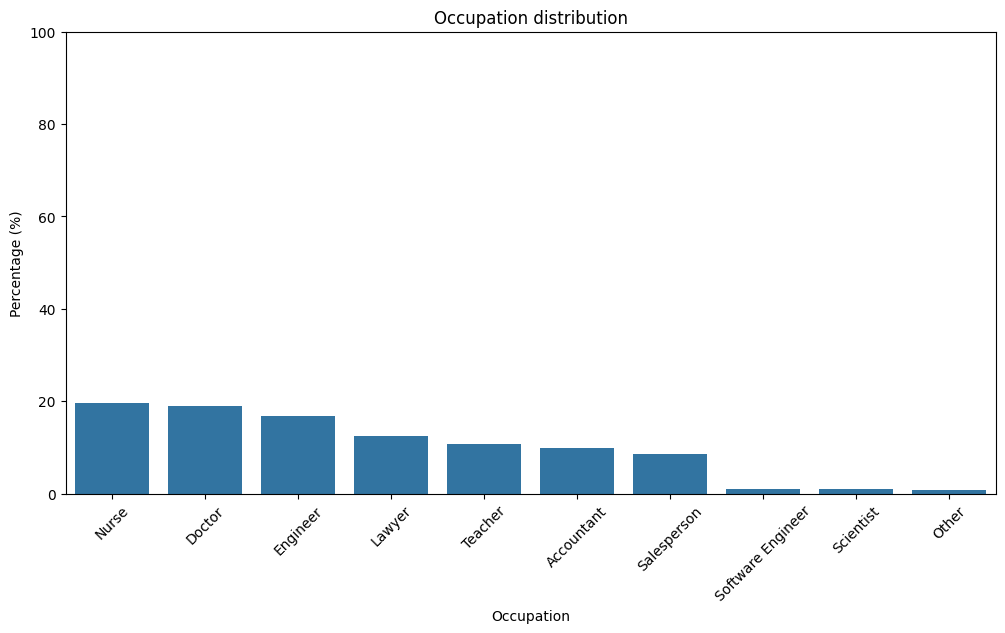

In [ ]:
occ_counts = df['Occupation'].value_counts()
rare_occ = occ_counts[occ_counts <= 2].index

df['Occupation_grouped'] = df['Occupation'].where(~df['Occupation'].isin(rare_occ), 'Other')

occupation_counts = df['Occupation_grouped'].value_counts()
occupation_percent = df['Occupation_grouped'].value_counts(normalize=True) * 100

#print(occupation_counts)
#print(occupation_percent)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=occupation_percent.index,
    y=occupation_percent.values
)
plt.ylabel("Percentage (%)")
plt.xlabel("Occupation")
plt.title("Occupation distribution")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()


Male vs Female

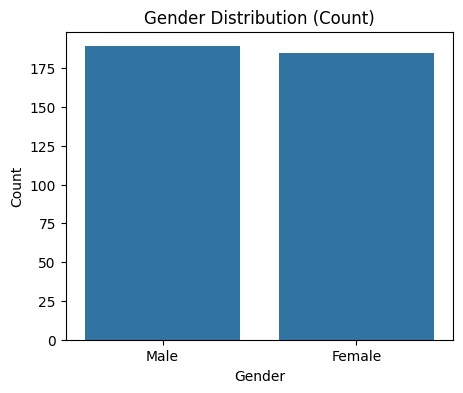

Gender
Male      189
Female    185
Name: count, dtype: int64


In [ ]:
gender_counts = df["Gender"].value_counts()

plt.figure(figsize=(5, 4))
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values
)
plt.ylabel("Count")
plt.xlabel("Gender")
plt.title("Gender Distribution (Count)")
plt.show()

print(gender_counts)

Main numeric variables we care about

In [ ]:
num_cols = [
    "Quality of Sleep",
    "Stress Level",
    "Physical Activity Level",
    "Age",
    "Daily Steps"
]

summary_table = df[num_cols].describe().T
summary_table = summary_table.round(2)

print(summary_table)

                         count     mean      std     min      25%     50%  \
Quality of Sleep         374.0     7.31     1.20     4.0     6.00     7.0   
Stress Level             374.0     5.39     1.77     3.0     4.00     5.0   
Physical Activity Level  374.0    59.17    20.83    30.0    45.00    60.0   
Age                      374.0    42.18     8.67    27.0    35.25    43.0   
Daily Steps              374.0  6816.84  1617.92  3000.0  5600.00  7000.0   

                            75%      max  
Quality of Sleep            8.0      9.0  
Stress Level                7.0      8.0  
Physical Activity Level    75.0     90.0  
Age                        50.0     59.0  
Daily Steps              8000.0  10000.0  


Sleep, Stress, Physical Activity – in one figure

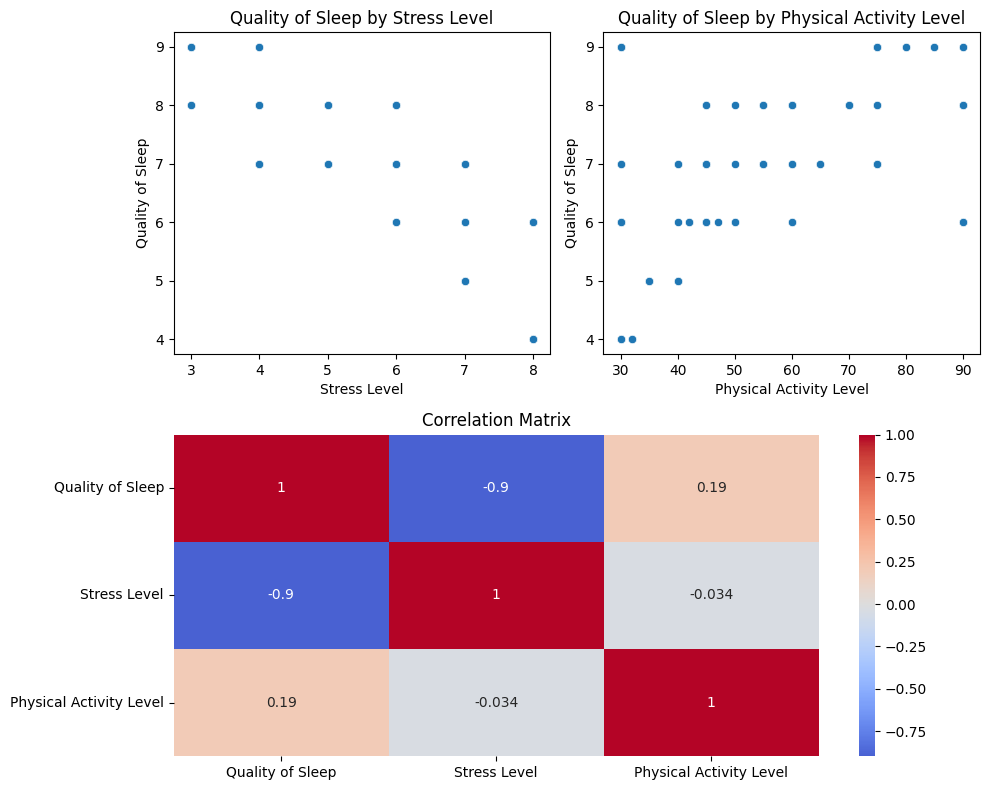

In [ ]:

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x="Stress Level", y="Quality of Sleep")
plt.title("Quality of Sleep by Stress Level")

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x="Physical Activity Level", y="Quality of Sleep")
plt.title("Quality of Sleep by Physical Activity Level")

plt.subplot(2, 2, (3, 4))
corr_matrix = df[["Quality of Sleep", "Stress Level", "Physical Activity Level"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")

plt.tight_layout()
plt.show()

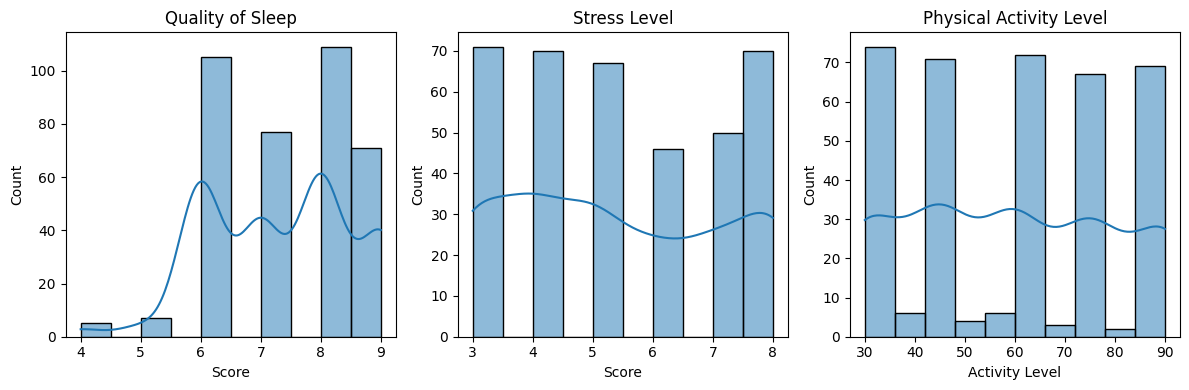

In [ ]:
plt.figure(figsize=(12, 4))

# 1. Quality of Sleep
plt.subplot(1, 3, 1)
sns.histplot(df["Quality of Sleep"], bins=10, kde=True)
plt.title("Quality of Sleep")
plt.xlabel("Score")
plt.ylabel("Count")

# 2. Stress Level
plt.subplot(1, 3, 2)
sns.histplot(df["Stress Level"], bins=10, kde=True)
plt.title("Stress Level")
plt.xlabel("Score")
plt.ylabel("Count")

# 3. Physical Activity Level
plt.subplot(1, 3, 3)
sns.histplot(df["Physical Activity Level"], bins=10, kde=True)
plt.title("Physical Activity Level")
plt.xlabel("Activity Level")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Age and Daily Steps

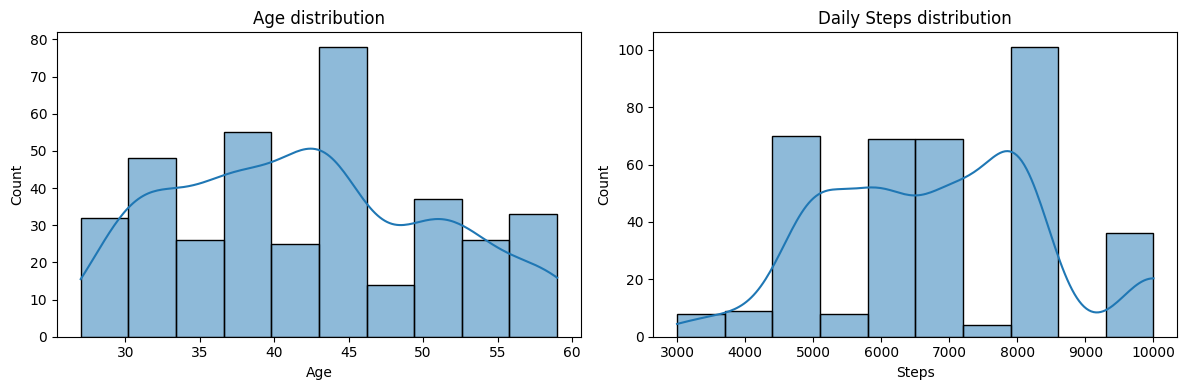

In [ ]:
plt.figure(figsize=(12, 4))

# 1. Age
plt.subplot(1, 2, 1)
sns.histplot(df["Age"], bins=10, kde=True)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Count")

# 2. Daily Steps
plt.subplot(1, 2, 2)
sns.histplot(df["Daily Steps"], bins=10, kde=True)
plt.title("Daily Steps distribution")
plt.xlabel("Steps")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

How do stress, physical activity, and BMI, age, gender, steps relate to sleep quality?

In [ ]:
formula = (
    'Q("Quality of Sleep") ~ '
    'Q("Stress Level") + '
    'Q("Physical Activity Level") + '
    'Age + '
    'Q("Daily Steps") + '
    'C(Q("BMI_Category")) + '
    'C(Gender)'
)

model = smf.ols(formula=formula, data=df)
results = model.fit()

print(results.summary())


                              OLS Regression Results                             
Dep. Variable:     Q("Quality of Sleep")   R-squared:                       0.940
Model:                               OLS   Adj. R-squared:                  0.939
Method:                    Least Squares   F-statistic:                     964.8
Date:                   Mon, 22 Dec 2025   Prob (F-statistic):          2.89e-221
Time:                           04:53:56   Log-Likelihood:                -70.114
No. Observations:                    374   AIC:                             154.2
Df Residuals:                        367   BIC:                             181.7
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
conf_int = results.conf_int(alpha=0.05)
conf_int.columns = ["CI_lower", "CI_upper"]

coef_and_ci = pd.concat(
    [results.params, results.pvalues, conf_int],
    axis=1
)
coef_and_ci.columns = ["coef", "p_value", "CI_lower", "CI_upper"]

coef_and_ci

,coef,p_value,CI_lower,CI_upper
Intercept,6.318656,3.002325e-125,5.981100,6.656211
"C(Q(""BMI_Category""))[T.Normal BMI]",0.899066,3.059389e-63,0.813275,0.984857
C(Gender)[T.Male],0.297127,1.928021e-12,0.216970,0.377283
"Q(""Stress Level"")",-0.484897,2.966360e-131,-0.509603,-0.460192
"Q(""Physical Activity Level"")",0.004605,4.029359e-04,0.002069,0.007140
Age,0.057010,5.489293e-63,0.051554,0.062466
"Q(""Daily Steps"")",0.000038,2.744214e-02,0.000004,0.000072


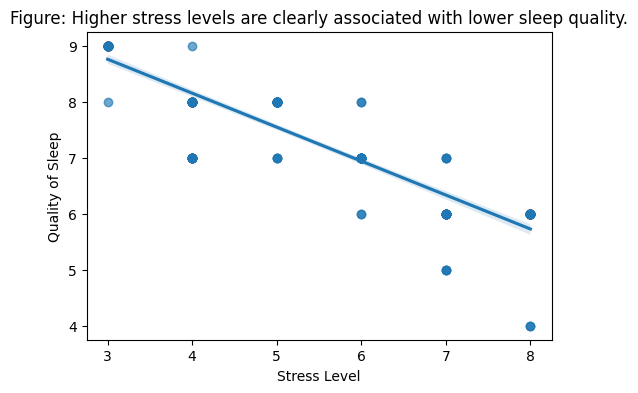

In [ ]:
plt.figure(figsize=(6, 4))
sns.regplot(
    data=df,
    x="Stress Level",
    y="Quality of Sleep",
    scatter_kws={"alpha": 0.4}
)
plt.title("Figure: Higher stress levels are clearly associated with lower sleep quality.")
plt.show()

Regression without daily steps

In [ ]:
model_full = smf.ols(
    'Q("Quality of Sleep") ~ Q("Stress Level") + Q("Physical Activity Level") '
    '+ Age + C(Q("BMI_Category")) + C(Gender)',
    data=df
)
results_full = model_full.fit()
print(results_full.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Quality of Sleep")   R-squared:                       0.940
Model:                               OLS   Adj. R-squared:                  0.939
Method:                    Least Squares   F-statistic:                     1145.
Date:                   Mon, 22 Dec 2025   Prob (F-statistic):          9.24e-222
Time:                           04:53:56   Log-Likelihood:                -72.596
No. Observations:                    374   AIC:                             157.2
Df Residuals:                        368   BIC:                             180.7
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
r, p_corr = stats.pearsonr(df["Physical Activity Level"], df["Daily Steps"])
print("Correlation r =", r, "p-value =", p_corr)

Correlation r = 0.7727230504529323 p-value = 1.9682558194617928e-75


Regression with interactions: Does the effect of stress on sleep quality differ between Normal BMI and High BMI?

In [ ]:
df["BMI_Category"] = df["BMI_Category"].astype("category")
df["Gender"] = df["Gender"].astype("category")

formula_int = (
    'Q("Quality of Sleep") ~ '
    'Q("Stress Level") * C(Q("BMI_Category")) + '  # main effects + interaction
    'Q("Physical Activity Level") + '
    'Age + '
    'Q("Daily Steps") + '
    'C(Gender)'
)

model_int = smf.ols(formula=formula_int, data=df)
results_int = model_int.fit()
print(results_int.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Quality of Sleep")   R-squared:                       0.944
Model:                               OLS   Adj. R-squared:                  0.943
Method:                    Least Squares   F-statistic:                     878.2
Date:                   Mon, 22 Dec 2025   Prob (F-statistic):          1.89e-224
Time:                           04:53:56   Log-Likelihood:                -59.059
No. Observations:                    374   AIC:                             134.1
Df Residuals:                        366   BIC:                             165.5
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

<Figure size 600x400 with 0 Axes>

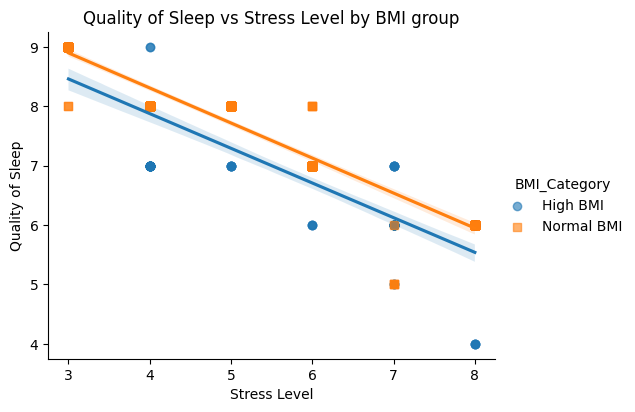

In [ ]:
plt.figure(figsize=(6, 4))
sns.lmplot(
    data=df,
    x="Stress Level",
    y="Quality of Sleep",
    hue="BMI_Category",   # "Normal BMI" vs "High BMI"
    height=4,
    aspect=1.3,
    markers=["o", "s"],
    scatter_kws={"alpha": 0.6}
)
plt.title("Quality of Sleep vs Stress Level by BMI group")
plt.show()

Hypothesis: “Higher physical activity lowers stress level.”

In [ ]:
model_pa = smf.ols('Q("Stress Level") ~ Q("Physical Activity Level")', data=df)
results_pa = model_pa.fit()
print(results_pa.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Stress Level")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4339
Date:                Mon, 22 Dec 2025   Prob (F-statistic):              0.510
Time:                        04:53:58   Log-Likelihood:                -744.47
No. Observations:                 374   AIC:                             1493.
Df Residuals:                     372   BIC:                             1501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [ ]:
r, p_corr = stats.pearsonr(df["Physical Activity Level"], df["Stress Level"])
print("Correlation r =", r, "p-value =", p_corr)

Correlation r = -0.03413446351674278 p-value = 0.5104666785066972


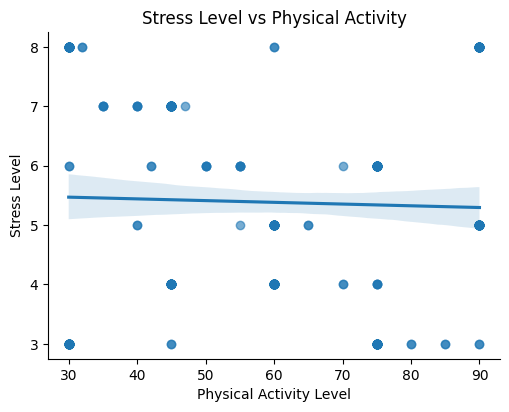

In [ ]:
sns.lmplot(
    data=df,
    x="Physical Activity Level",
    y="Stress Level",
    height=4,
    aspect=1.3,
    scatter_kws={"alpha": 0.6}
)
plt.title("Stress Level vs Physical Activity")
plt.show()

Hypothesis: Higher physical activity is associated with better sleep quality

In [ ]:
model_sleep_act = smf.ols('Q("Quality of Sleep") ~ Q("Physical Activity Level")', data=df)
results_sleep_act = model_sleep_act.fit()
print(results_sleep_act.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Quality of Sleep")   R-squared:                       0.037
Model:                               OLS   Adj. R-squared:                  0.035
Method:                    Least Squares   F-statistic:                     14.38
Date:                   Mon, 22 Dec 2025   Prob (F-statistic):           0.000175
Time:                           04:53:58   Log-Likelihood:                -590.33
No. Observations:                    374   AIC:                             1185.
Df Residuals:                        372   BIC:                             1193.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [ ]:
r, p = stats.pearsonr(df["Physical Activity Level"], df["Quality of Sleep"])
print("r =", r, "p =", p)

r = 0.19289645493975327 p = 0.00017454895247838838


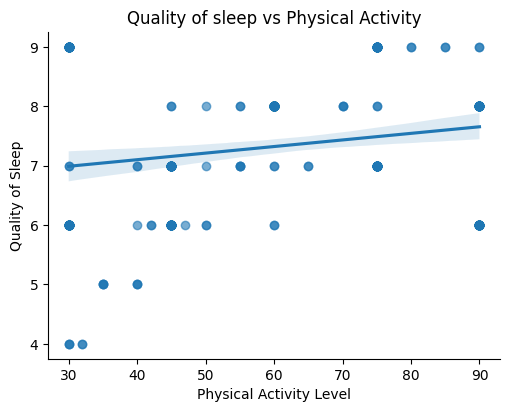

In [ ]:
sns.lmplot(
    data=df,
    x="Physical Activity Level",
    y="Quality of Sleep",
    height=4,
    aspect=1.3,
    scatter_kws={"alpha": 0.6}
)
plt.title("Quality of sleep vs Physical Activity")
plt.show()

t-test: does high stress mean worse sleep?

In [ ]:
high_stress = df.loc[df["Stress Level"] >= 7, "Quality of Sleep"].dropna()
low_stress  = df.loc[df["Stress Level"] <= 3, "Quality of Sleep"].dropna()

print("High stress n =", len(high_stress))
print("Low stress  n =", len(low_stress))
print("Mean sleep quality (high stress):", high_stress.mean())
print("Mean sleep quality (low stress): ", low_stress.mean())

t_stat, p_val = stats.ttest_ind(low_stress, high_stress, equal_var=False)
print("t =", t_stat, "p-value =", p_val)

High stress n = 120
Low stress  n = 71
Mean sleep quality (high stress): 5.916666666666667
Mean sleep quality (low stress):  8.971830985915492
t = 58.64833547347876 p-value = 1.0309117838295226e-107


χ² test: high stress vs BMI

In [ ]:
df["HighStress"] = (df["Stress Level"] >= 7).astype(int)

ct = pd.crosstab(df["BMI_Category"], df["HighStress"])
print(ct)

chi2, p, dof, expected = stats.chi2_contingency(ct)
print("Chi-square =", chi2, "df =", dof, "p-value =", p)

HighStress      0   1
BMI_Category         
High BMI       76  82
Normal BMI    178  38
Chi-square = 47.7228261455561 df = 1 p-value = 4.909421003446847e-12


Annex 1: Checking residuals distribution

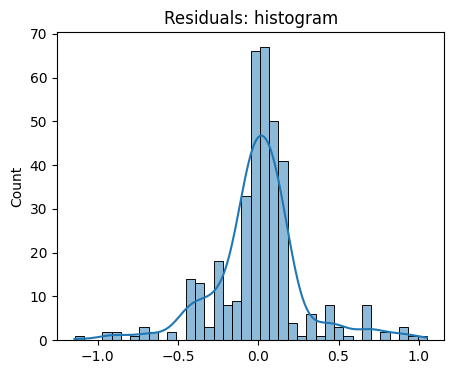

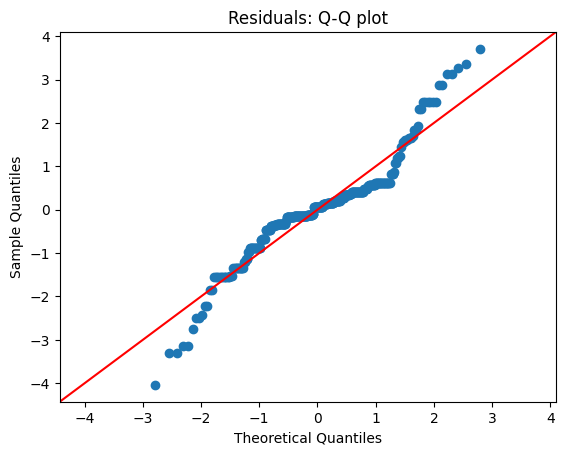

In [ ]:
resid = results_int.resid
# Histogram + KDE
plt.figure(figsize=(5,4))
sns.histplot(resid, kde=True)
plt.title("Residuals: histogram")
plt.show()

# QQ-plot
sm.qqplot(resid, line="45", fit=True)
plt.title("Residuals: Q-Q plot")
plt.show()